In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df_bank = pd.read_csv("../data/processed/bank-additional_clean.csv")

In [28]:
df_bank.sample(2)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,nr.employed,y,date,latitude,longitude,id_,day,year,month,campaign_edit
16258,30.0,management,MARRIED,university.degree,0.0,1.0,0.0,cellular,217,2,...,5228.1,no,2016-10-12,32.754,-124.471,227398a0-2fe4-45b0-965a-a76d43f42ece,12.0,2016.0,10.0,2
7031,60.0,admin.,SINGLE,high.school,0.0,1.0,0.0,telephone,609,1,...,5191.0,no,2016-10-26,33.057,-85.700,ac15e7c4-15bc-4920-b058-b01612830a5c,26.0,2016.0,10.0,1


In [29]:
df_cus = pd.read_csv("../data/processed/customer-details_clean.xlsx")

In [30]:
df_cus.sample(2)

,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
25039,39410,1,0,2013-05-02,32,e29a7570-772a-4634-8d86-bc5deedb84a6
8623,10296,0,2,2012-12-20,12,9a339692-342b-4aa1-b87d-0805818cfa9f


In [31]:
# Renombrar columna de df_cus para que coincida
df_cus = df_cus.rename(columns={"ID": "id_"})
df_cus.sample(2)

,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,id_
35910,118064,1,0,2014-04-21,4,6023e0d1-09b6-4a4e-8bdf-a90ee0344f70
6773,110281,1,0,2012-03-10,4,8b1af5b1-54c8-4a50-8acd-898923a49694


### Unión de las tablas Bank y Customer

En este punto tenemos dos tablas distintas:  
- **Bank**, con información sobre las campañas bancarias.  
- **Customer**, con datos demográficos y de comportamiento de los clientes.  

Para poder hacer un análisis conjunto, necesitamos unirlas en una sola tabla usando la columna de identificación de cliente (id_).  

Entre las distintas opciones que ofrece Pandas (`concat`, `join` y `merge`), elegimos **`merge`** porque:  
- Nos permite unir los DataFrames basándonos en una columna común (en este caso tenemos id_).  
- Es muy flexible: podemos elegir si queremos conservar solo las coincidencias (`inner`), todos los registros de una tabla (`left` o `right`), o todo el universo (`outer`).  
- De esta manera conseguimos una única tabla final donde cada cliente tiene tanto la información de campañas como sus características personales.  

En nuestro caso usamos `merge` con un 'inner join', para quedarnos únicamente con los clientes que aparecen en ambas tablas.


In [32]:
df_union = pd.merge(df_bank, df_cus, on="id_", how="inner")
df_union.head()


,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,id_,day,year,month,campaign_edit,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth
0,38.0,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,...,089b39d8-e4d0-461b-87d4-814d71e0e079,2.0,2019.0,8.0,1,161770,1,0,2012-04-04,29
1,57.0,services,MARRIED,high.school,unknown,0.0,0.0,telephone,149,1,...,e9d37224-cb6f-4942-98d7-46672963d097,14.0,2016.0,9.0,1,85477,1,1,2012-12-30,7
2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,...,3f9f49b5-e410-4948-bf6e-f9244f04918b,15.0,2019.0,2.0,1,147233,1,1,2012-02-02,5
3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,...,9991fafb-4447-451a-8be2-b0df6098d13e,29.0,2015.0,11.0,1,121393,1,2,2012-12-21,29
4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,...,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,29.0,2017.0,1.0,1,63164,1,2,2012-06-20,20


In [39]:
df_union.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                43000 non-null  float64
 1   job                43000 non-null  object 
 2   marital            43000 non-null  object 
 3   education          43000 non-null  object 
 4   default            43000 non-null  object 
 5   housing            43000 non-null  object 
 6   loan               43000 non-null  object 
 7   contact            43000 non-null  object 
 8   duration           43000 non-null  int64  
 9   campaign           43000 non-null  int64  
 10  pdays              43000 non-null  int64  
 11  previous           43000 non-null  int64  
 12  poutcome           43000 non-null  object 
 13  emp.var.rate       43000 non-null  float64
 14  cons.price.idx     43000 non-null  float64
 15  cons.conf.idx      43000 non-null  float64
 16  euribor3m          430

In [44]:
df_union.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,latitude,longitude,day,year,month,campaign_edit,Income,Kidhome,Teenhome,NumWebVisitsMonth
count,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,42752.000000,42752.000000,42752.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000
mean,39.741698,257.739279,2.567233,962.330953,0.174023,0.077128,93.576134,-40.509049,3.883541,5166.852602,36.856697,-95.939067,16.022853,2017.001310,6.502058,2.435837,93241.200070,1.004791,0.998605,16.589698
std,9.817735,258.666033,2.772294,187.260394,0.497366,1.573898,0.576652,4.637186,1.621095,72.411125,7.225948,16.752282,8.922815,1.414312,3.448718,2.027767,50498.316182,0.815913,0.815983,9.239205
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,24.396000,-124.997000,1.000000,2015.000000,1.000000,1.000000,5841.000000,0.000000,0.000000,1.000000
25%,33.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.466000,5099.100000,30.614750,-110.494250,8.000000,2016.000000,4.000000,1.000000,49610.000000,0.000000,0.000000,9.000000
50%,38.000000,179.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,36.761000,-95.899500,16.000000,2017.000000,7.000000,2.000000,93050.500000,1.000000,1.000000,17.000000
75%,46.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.959000,5228.100000,43.113250,-81.427750,24.000000,2018.000000,10.000000,3.000000,136744.500000,2.000000,2.000000,25.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,49.384000,-66.937000,31.000000,2019.000000,12.000000,10.000000,180802.000000,2.000000,2.000000,32.000000


La idea es ver si los clientes con más ingresos tienen más tendencia a aceptar el producto.
Para ello uso un boxplot

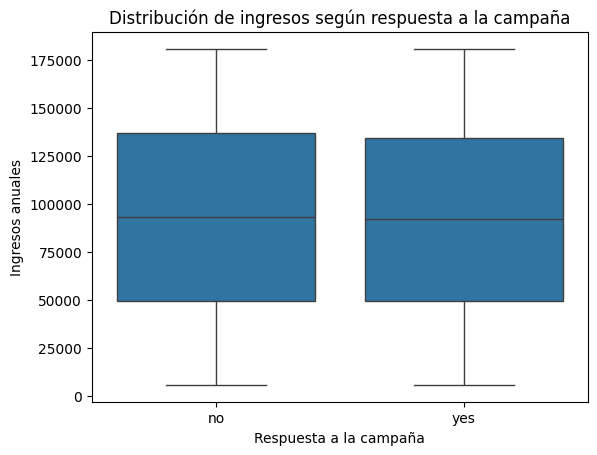

In [48]:
sns.boxplot(x="y", y="Income", data=df_union)
plt.title("Distribución de ingresos según respuesta a la campaña")
plt.ylabel("Ingresos anuales")
plt.xlabel("Respuesta a la campaña")
plt.show()



El gráfico muestra que las distribuciones de ingresos en los dos grupos son muy similares.
La mediana (línea negra dentro de la caja) está prácticamente en el mismo nivel tanto en clientes que rechazaron ("no") como en los que aceptaron ("yes").
Esto sugiere que el ingreso anual no parece ser un factor determinante en la decisión del cliente.

Ahora analizamos si la frecuencia de visitas a la web de la empresa (NumWebVisitsMonth) tiene alguna relación con la respuesta del cliente a la campaña (y)

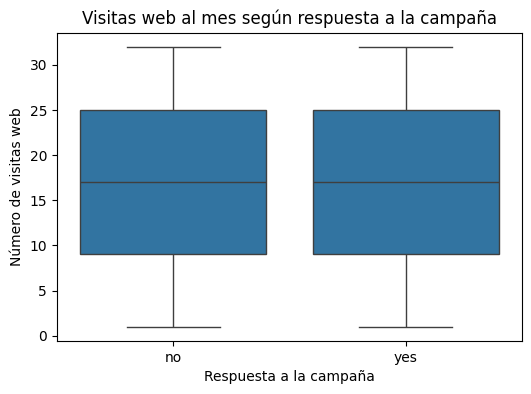

In [51]:
plt.figure(figsize=(6,4))
sns.boxplot(x="y", y="NumWebVisitsMonth", data=df_union)
plt.title("Visitas web al mes según respuesta a la campaña")
plt.xlabel("Respuesta a la campaña")
plt.ylabel("Número de visitas web")
plt.show()


Queremos comprobar si la antigüedad del cliente en la empresa (fecha de alta, Dt_Customer) tiene alguna relación con la probabilidad de aceptar la campaña.
Para ello, transformamos la fecha en un campo que mida el año de alta del cliente y lo comparamos con la respuesta (y).

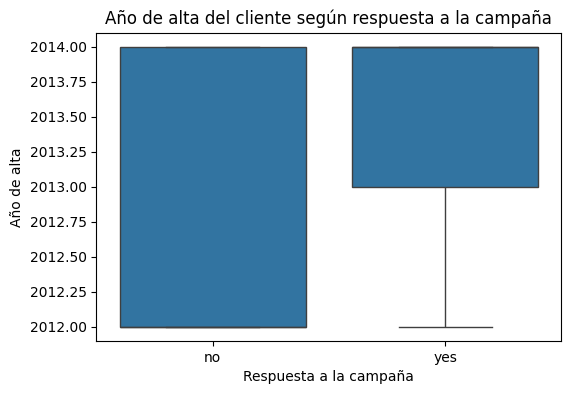

In [ ]:
# Extraer el año de alta
df_union["year_customer"] = pd.to_datetime(df_union["Dt_Customer"]).dt.year
plt.figure(figsize=(6,4))
sns.boxplot(x="y", y="year_customer", data=df_union)
plt.title("Año de alta del cliente según respuesta a la campaña")
plt.xlabel("Respuesta a la campaña")
plt.ylabel("Año de alta")
plt.show()


En el boxplot se observa que los clientes que respondieron "yes" y los que respondieron "no" están concentrados en los mismos años (principalmente entre 2012 y 2014).
No se aprecia una gran diferencia entre ambos grupos, lo que sugiere que el año de alta en el banco no tuvo un impacto determinante en la respuesta a la campaña.


En este apartado analizamos si el número de hijos en el hogar (`Kidhome`) influye en la respuesta a la campaña (`y`).  
La idea es comprobar si los hogares con más o menos hijos muestran diferencias en la tasa de respuesta.

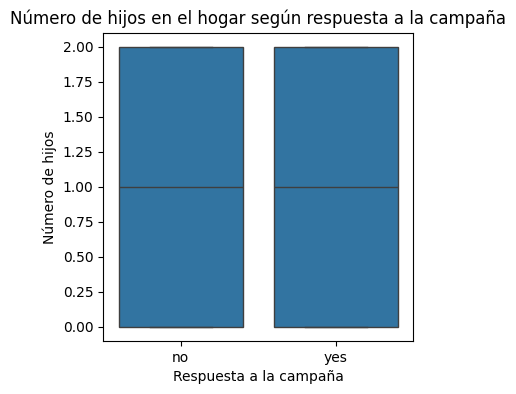

In [59]:
plt.figure(figsize=(4,4))
sns.boxplot(x="y", y="Kidhome", data=df_union)
plt.title("Número de hijos en el hogar según respuesta a la campaña")
plt.xlabel("Respuesta a la campaña")
plt.ylabel("Número de hijos")
plt.show()


El número de hijos en el hogar (Kidhome) no parece tener un impacto claro en la respuesta a la campaña. Tanto los clientes que respondieron sí como los que respondieron no tienen distribuciones prácticamente iguales, concentradas en valores de 0, 1 o 2 hijos.
En resumen, la variable Kidhome no aporta diferencias significativas que puedan explicar la respuesta a la campaña.

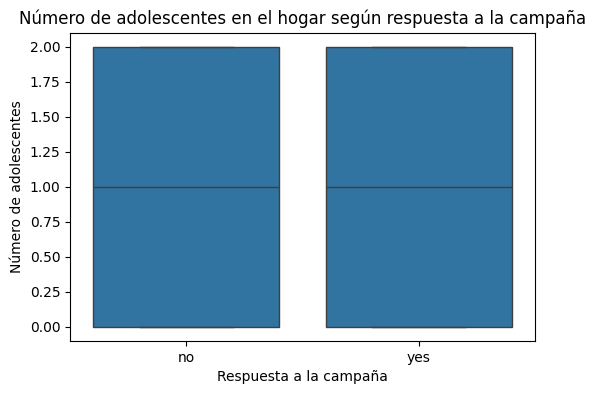

In [60]:
plt.figure(figsize=(6,4))
sns.boxplot(x="y", y="Teenhome", data=df_union)
plt.title("Número de adolescentes en el hogar según respuesta a la campaña")
plt.xlabel("Respuesta a la campaña")
plt.ylabel("Número de adolescentes")
plt.show()


Al observarlo, se aprecia que la mediana y los valores se mantienen prácticamente iguales en ambos casos, lo que indica que tener adolescentes en el hogar no parece marcar una diferencia en la decisión de participar en la campaña.

En general, el análisis muestra que variables como edad, ingresos, año de alta o número de hijos no marcan grandes diferencias en la respuesta a la campaña. Esto sugiere que el éxito podría estar más relacionado con otros factores, como el tipo de contacto, la duración de la llamada o la situación laboral, que en los gráficos iniciales sí presentaban patrones más claros.